In [4]:
%load_ext autoreload
%autoreload 2
from dark_matters.input import read_input_file,read_dm_output
from dark_matters.calculations import run_calculation
from dark_matters.output import fits_map,make_output
from astropy import units
from astropy.coordinates import SkyCoord
from matplotlib import pyplot as plt
import numpy as np 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
data_sets = read_input_file("Draco.yaml")
print(data_sets)

{'halo_data': {'cvir': 8.743197954, 'mvir': np.float64(1200000000000000.0), 'name': 'droco', 'profile': 'nfw', 'rvir': np.float64(2.7), 'scale': np.float64(0.003507740839), 'z': 0.0231}, 'mag_data': {'index': -0.327, 'mag_norm': 2.0, 'profile': 'beta', 'scale': np.float64(0.253), 'mag_func_lock': False}, 'gas_data': {'index': -0.654, 'gas_norm': np.float64(0.00349), 'profile': 'beta', 'scale': np.float64(0.253)}, 'diff_data': {'diff_constant': np.float64(2.77e+28), 'diff_index': 0.35, 'loss_only': False}, 'part_data': {'em_model': 'annihilation', 'part_model': 'mumu', 'cross_section': 3e-26}, 'calc_data': {'os_max_steps': 20, 'calc_mode': 'sb', 'e_sample_number': 50, 'electron_mode': 'os-python', 'f_sample_limits': array([   1., 1000.]), 'f_sample_num': 40, 'f_sample_spacing': 'log', 'f_sample_values': [150], 'freq_mode': 'radio', 'log10_r_sample_min_factor': -3, 'm_wimp': array([50.]), 'r_sample_num': 51}, 'cosmo_data': {}}


In [6]:
output_data = run_calculation(**data_sets)

Beginning DarkMatters calculations
Frequency mode: radio
Calculation type: sb
Run Parameters
Frequency Samples: 1
Minimum Frequency Sampled: 1.50e+02 MHz (6.20e-16 GeV) 
Maximum Frequency Sampled: 1.50e+02 MHz (6.20e-16 GeV)
Radial Grid Intervals: 51
Minimum Sampled Radius: 3.51e-06 Mpc
Maximum Sampled Radius: 5.40e+00 Mpc
Halo Parameters: 
Halo Name: droco
Redshift z: 2.31e-02
Luminosity Distance: 1.04e+02 Mpc
Halo profile: nfw
Virial Mass: 1.20e+15 Solar Masses
Virial Radius: 2.70e+00 Mpc
Halo scale radius: 3.51e-03 Mpc
Rho_s/Rho_crit: 3.01e+09
Virial Concentration: 8.74
Gas Parameters: 
Gas density profile: beta
scale: 0.253 Mpc 
index: -0.654
gas_norm: 0.00349 cm^-3 
Magnetic Field Parameters: 
Magnetic field profile: beta
mag_norm: 2.0 micro-Gauss 
scale: 0.253 Mpc 
index: -0.327
Spatial Diffusion
Turbulence index: 0.35
Diffusion constant: 2.77e+28 cm^2 s^-1
Now calculating for Dark Matter model: 
WIMP mass: 50.0 GeV
Particle physics: mumu
Emission type: annihilation
Calculating E

In [7]:
make_output(**output_data,out_mode="yaml")

In [12]:
freq_index = (np.abs(output_data['calc_data']['results']['f_sample_values']))
print(output_data['calc_data']['results']['units'])

{'electron_data': 'GeV/cm^3', 'radio_em_data': 'GeV/cm^3', 'primary_em_data': 'GeV/cm^3', 'secondary_em_data': 'GeV/cm^3', 'f_sample_values': 'MHz', 'final_data': 'Jy/sr', 'ang_sample_values': 'arcmin', 'r_sample_values': 'Mpc', 'e_sample_values': 'GeV'}


{'electron_data': 'GeV/cm^3', 'radio_em_data': 'GeV/cm^3', 'primary_em_data': 'GeV/cm^3', 'secondary_em_data': 'GeV/cm^3', 'f_sample_values': 'MHz', 'final_data': 'Jy/sr', 'ang_sample_values': 'arcmin', 'r_sample_values': 'Mpc', 'e_sample_values': 'GeV'}


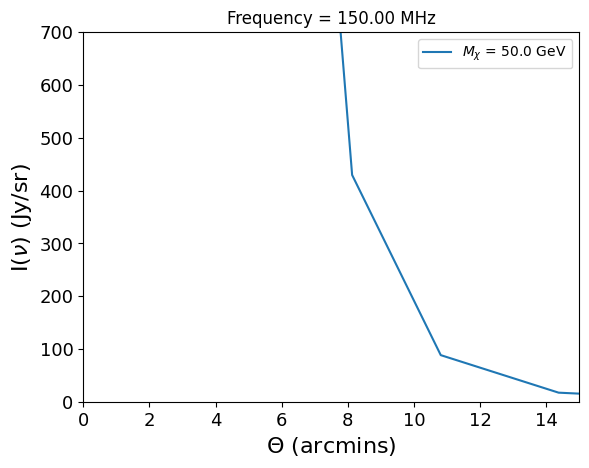

In [47]:
freq_index = (np.abs(output_data['calc_data']['results']['f_sample_values'])).argmin()
print(output_data['calc_data']['results']['units'])

for i in range(len(output_data['calc_data']['m_wimp'])):
    plt.plot(output_data['calc_data']['results']['ang_sample_values'],output_data['calc_data']['results']['final_data'][i][freq_index],label=r"$M_\chi$ = "+str(output_data['calc_data']['m_wimp'][i])+" GeV")
plt.xscale("linear")
plt.yscale("linear")
plt.xlim(0,15)
plt.ylim(0,700)
plt.ylabel(r"I$(\nu)$ (Jy/sr)",fontsize=16)
plt.xlabel(r"$\Theta$ (arcmins)",fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(f"Frequency = {output_data['calc_data']['results']['f_sample_values'][freq_index]:.2f} MHz")
plt.legend()
plt.show()

{'electron_data': 'GeV/cm^3', 'radio_em_data': 'GeV/cm^3', 'primary_em_data': 'GeV/cm^3', 'secondary_em_data': 'GeV/cm^3', 'f_sample_values': 'MHz', 'final_data': 'Jy/sr', 'ang_sample_values': 'arcmin', 'r_sample_values': 'Mpc', 'e_sample_values': 'GeV'}


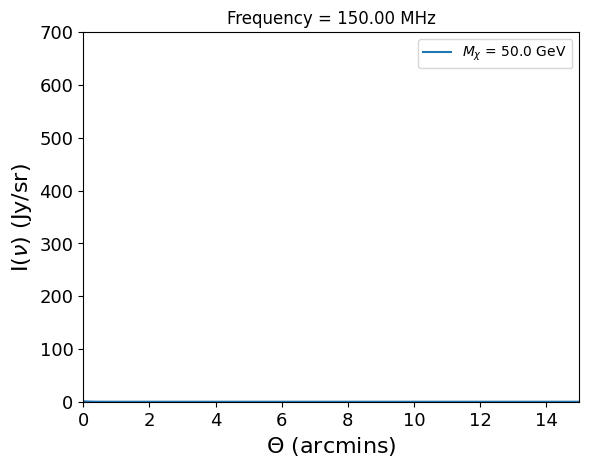

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming output_data is already defined and contains the necessary structure

# Get the frequency index closest to 0
freq_index = (np.abs(output_data['calc_data']['results']['f_sample_values'])).argmin()

# Print units (for reference)
print(output_data['calc_data']['results']['units'])

# Create a plot for each m_wimp value
for i in range(len(output_data['calc_data']['m_wimp'])):
    # Extract the y-data for this m_wimp at the selected frequency
    y_data = np.array(output_data['calc_data']['results']['final_data'][i][freq_index])
    
    # Min-Max normalization
    y_normalized = (y_data - np.min(y_data)) / (np.max(y_data) - np.min(y_data))
    
    # Plot the normalized data
    plt.plot(output_data['calc_data']['results']['ang_sample_values'], y_normalized, 
             label=r"$M_\chi$ = " + str(output_data['calc_data']['m_wimp'][i]) + " GeV")

# Set y-axis to log scale


# Set the x and y axis limits
plt.xlim(0, 15)  # x-axis limit between 0 and 15
plt.ylim(0, 700)  # y-axis limit between 1 and 10^7

# Set labels and title
plt.ylabel(r"I$(\nu)$ (Jy/sr)", fontsize=16)
plt.xlabel(r"$\Theta$ (arcmins)", fontsize=16)

# Set tick labels' font size
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Set the title with the frequency at the selected index
plt.title(f"Frequency = {output_data['calc_data']['results']['f_sample_values'][freq_index]:.2f} MHz")

# Add the legend
plt.legend()

# Show the plot
plt.show()

{'electron_data': 'GeV/cm^3', 'radio_em_data': 'GeV/cm^3', 'primary_em_data': 'GeV/cm^3', 'secondary_em_data': 'GeV/cm^3', 'f_sample_values': 'MHz', 'final_data': 'Jy/sr', 'ang_sample_values': 'arcmin', 'r_sample_values': 'Mpc', 'e_sample_values': 'GeV'}


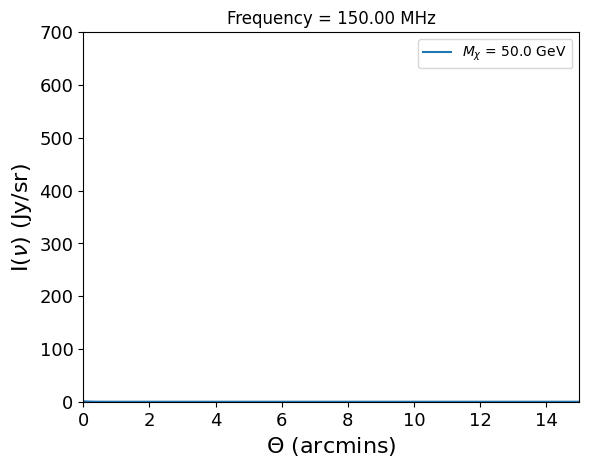

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming output_data is already defined and contains the necessary structure

# Get the frequency index closest to 0 (or any other frequency)
freq_index = (np.abs(output_data['calc_data']['results']['f_sample_values'])).argmin()

# Print units (for reference)
print(output_data['calc_data']['results']['units'])

# Create a plot for each m_wimp value
for i in range(len(output_data['calc_data']['m_wimp'])):
    # Extract the y-data for this m_wimp at the selected frequency
    y_data = np.array(output_data['calc_data']['results']['final_data'][i][freq_index])
    
    # Min-Max normalization
    a, b = 0, 700
    y_custom_normalized = a + ((y_data - np.min(y_data)) * (b - a)) / (np.max(y_data) - np.min(y_data))
    
    # Plot the normalized data
    plt.plot(output_data['calc_data']['results']['ang_sample_values'], y_normalized, label=r"$M_\chi$ = " + str(output_data['calc_data']['m_wimp'][i]) + " GeV")

# Set the x and y axis limits
plt.xlim(0, 15)  # x-axis limit between 0 and 15
plt.ylim(0, 700)  # y-axis limit between 0 and 700

# Set labels and title
plt.ylabel(r"I$(\nu)$ (Jy/sr)", fontsize=16)
plt.xlabel(r"$\Theta$ (arcmins)", fontsize=16)

# Set tick labels' font size
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Set the title with the frequency at the selected index
plt.title(f"Frequency = {output_data['calc_data']['results']['f_sample_values'][freq_index]:.2f} MHz")

# Add the legend
plt.legend()

# Show the plot
plt.show()